# Data Preprocessing:

### Load the dataset into a suitable data structure (e.g., pandas DataFrame). Handle missing values
### Explore the dataset to understand its structure and attributes.


In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 
import matplotlib.pyplot as plt
import plotly.express as px
from textblob import TextBlob
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer

In [125]:
df = pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [126]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [127]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [128]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [129]:
x = df.groupby(['rating']).size().reset_index(name = 'counts')
print(x)

     rating  counts
0      1.67       1
1      1.92       1
2      2.00       1
3      2.14       1
4      2.37       1
..      ...     ...
593    9.33       1
594    9.37       1
595    9.50       1
596    9.60       1
597   10.00       1

[598 rows x 2 columns]


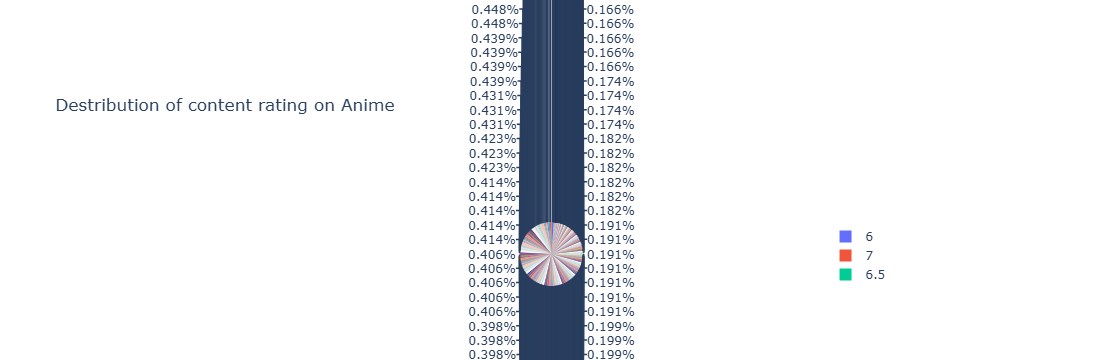

In [130]:
pieChart = px.pie(x, values='counts', names='rating', title='Destribution of content rating on Anime')
pieChart.show()

# Feature Extraction:

### Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
### Convert categorical features into numerical representations if necessary.
### Normalize numerical features if required.


In [131]:
episodes_list = pd.DataFrame()
print(episodes_list)

Empty DataFrame
Columns: []
Index: []


In [132]:
episodes_list = df['name'].str.split(',',expand = True).stack()
print(episodes_list)

0      0                                       Kimi no Na wa.
1      0                     Fullmetal Alchemist: Brotherhood
2      0                                             Gintama°
3      0                                          Steins;Gate
4      0                                        Gintama&#039;
                                  ...                        
12289  0         Toushindai My Lover: Minami tai Mecha-Minami
12290  0                                          Under World
12291  0                       Violence Gekiga David no Hoshi
12292  0    Violence Gekiga Shin David no Hoshi: Inma Dens...
12293  0                     Yasuji no Pornorama: Yacchimae!!
Length: 12494, dtype: object


In [133]:
episodes_list = episodes_list.to_frame()
episodes_list

,,0
0,0,Kimi no Na wa.
1,0,Fullmetal Alchemist: Brotherhood
2,0,Gintama°
3,0,Steins;Gate
4,0,Gintama&#039;
...,...,...
12289,0,Toushindai My Lover: Minami tai Mecha-Minami
12290,0,Under World
12291,0,Violence Gekiga David no Hoshi
12292,0,Violence Gekiga Shin David no Hoshi: Inma Dens...


In [134]:
episodes_list.columns = ['anime']
print(episodes_list)

                                                     anime
0     0                                     Kimi no Na wa.
1     0                   Fullmetal Alchemist: Brotherhood
2     0                                           Gintama°
3     0                                        Steins;Gate
4     0                                      Gintama&#039;
...                                                    ...
12289 0       Toushindai My Lover: Minami tai Mecha-Minami
12290 0                                        Under World
12291 0                     Violence Gekiga David no Hoshi
12292 0  Violence Gekiga Shin David no Hoshi: Inma Dens...
12293 0                   Yasuji no Pornorama: Yacchimae!!

[12494 rows x 1 columns]


In [135]:
episodes = episodes_list.groupby(['anime']).size().reset_index(name = 'Total counts')
episodes

,anime,Total counts
0,,1
1,15-sai.,1
2,2,1
3,33-sai,2
4,Abe Reiji: Heikinteki na Salaryman no Ijou na...,1
...,...,...
12444,xxxHOLiC Rou,1
12445,xxxHOLiC Shunmuki,1
12446,Üks Uks,1
12447,ēlDLIVE,1


In [136]:
episodes = episodes[episodes.anime != 'Episodes not a specifies']
print(episodes)

                                                   anime  Total counts
0                                                                    1
1                                                15-sai.             1
2                                                      2             1
3                                                 33-sai             2
4       Abe Reiji: Heikinteki na Salaryman no Ijou na...             1
...                                                  ...           ...
12444                                       xxxHOLiC Rou             1
12445                                  xxxHOLiC Shunmuki             1
12446                                            Üks Uks             1
12447                                            ēlDLIVE             1
12448                                                  ◯             1

[12449 rows x 2 columns]


In [137]:
episodes = episodes.sort_values(by = ['Total counts'])
episodes

,anime,Total counts
0,,1
8288,Ore wa Teppei,1
8289,Ore-sama Kingdom,1
8290,Ore-tachi,1
8291,Ore-tachi Ijiwaru Kei,1
...,...,...
92,Konkon,3
12115,Yondemasu yo,3
2123,Dakara Boku wa,3
5869,Kono Danshi,4


In [138]:
episodes = episodes.sort_values(by = ['Total counts'],ascending = False)
episodes

,anime,Total counts
11777,Wake Up,10
5869,Kono Danshi,4
2123,Dakara Boku wa,3
12115,Yondemasu yo,3
92,Konkon,3
...,...,...
12402,Zonmi-chan: Halloween☆Special Movie!,1
12403,Zonmi-chan: Meat Pie of the Dead,1
12404,Zoobles!,1
12405,Zou no Inai Doubutsuen,1


In [139]:
Top_5_episodes = episodes.head()
Top_5_episodes

,anime,Total counts
11777,Wake Up,10
5869,Kono Danshi,4
2123,Dakara Boku wa,3
12115,Yondemasu yo,3
92,Konkon,3


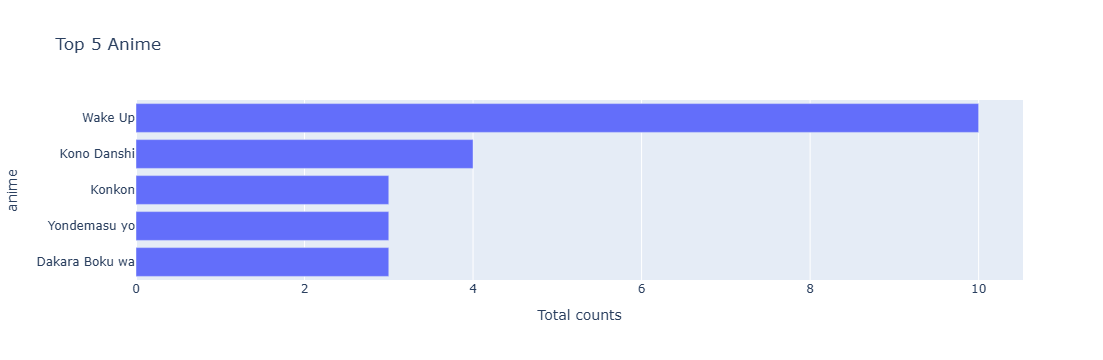

In [140]:
Top_5_episodes = Top_5_episodes.sort_values(by = ['Total counts'])
barChart = px.bar(Top_5_episodes,x='Total counts',y= 'anime',title = 'Top 5 Anime')
barChart.show()

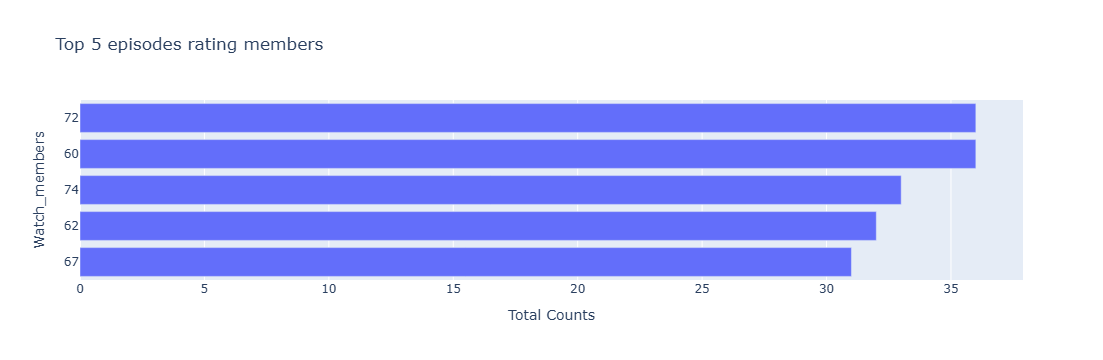

In [141]:
df['members'] = df['members'].astype(str)
cast_df = pd.DataFrame()
cast_df = df['members'].str.split(',', expand=True).stack()
cast_df = cast_df.to_frame()
cast_df.columns = ['Watch_members']
Epi_mem = cast_df.groupby(['Watch_members']).size().reset_index(name='Total Counts')
Epi_mem = Epi_mem[Epi_mem.Watch_members != 'No cast specified']
Epi_mem = Epi_mem.sort_values(by=['Total Counts'], ascending=False)
Top_5_episodes_rating_member = Epi_mem.head()
Top_5_episodes_rating_member = Top_5_episodes_rating_member.sort_values(by=['Total Counts'])
barchart2 = px.bar(Top_5_episodes_rating_member, x='Total Counts', y='Watch_members', title='Top 5 episodes rating members')
barchart2.show()

# Recommendation System:

### Design a function to recommend anime based on cosine similarity.
### Given a target anime, recommend a list of similar anime based on cosine similarity scores.
### Experiment with different threshold values for similarity scores to adjust the recommendation list size.


In [142]:
selection_features = ['name','type','episodes', 'rating', 'members']
print(selection_features)

['name', 'type', 'episodes', 'rating', 'members']


In [143]:
for feature in selection_features:
  df[feature] = df[feature].fillna('')

In [144]:
combined_features = df['name'].astype(str)+' '+df['type'].astype(str)+' '+df['episodes'].astype(str)+' '+df['rating'].astype(str)+' '+df['members'].astype(str)

In [145]:
print(combined_features)

0                       Kimi no Na wa. Movie 1 9.37 200630
1        Fullmetal Alchemist: Brotherhood TV 64 9.26 79...
2                               Gintama° TV 51 9.25 114262
3                            Steins;Gate TV 24 9.17 673572
4                          Gintama&#039; TV 51 9.16 151266
                               ...                        
12289    Toushindai My Lover: Minami tai Mecha-Minami O...
12290                           Under World OVA 1 4.28 183
12291        Violence Gekiga David no Hoshi OVA 4 4.88 219
12292    Violence Gekiga Shin David no Hoshi: Inma Dens...
12293    Yasuji no Pornorama: Yacchimae!! Movie 1 5.46 142
Length: 12294, dtype: object


In [146]:
vectorizer = TfidfVectorizer()

In [147]:
feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 12059)	0.430005667577408
  (0, 14126)	0.15732728496748313
  (0, 13750)	0.36491420914039135
  (0, 17999)	0.31129948342618396
  (0, 13644)	0.17270690620469445
  (0, 3914)	0.3535797906002482
  (0, 2079)	0.6367316224834362
  (1, 9596)	0.4318838003352716
  (1, 6996)	0.4318838003352716
  (1, 7796)	0.46877628883199696
  (1, 17700)	0.11553872744480928
  (1, 5507)	0.28498334712812484
  (1, 2888)	0.21162112541683148
  (1, 6116)	0.5175455058661269
  (2, 17700)	0.15254753658362713
  (2, 9943)	0.5329337631113226
  (2, 4869)	0.3552774197599113
  (2, 2770)	0.3155284837579884
  (2, 394)	0.6833231915897455
  (3, 17700)	0.12982661490459282
  (3, 16739)	0.5066234208494951
  (3, 9787)	0.45355689106903085
  (3, 2656)	0.2828832727788914
  (3, 1561)	0.3202252965742455
  (3, 5664)	0.581546833444053
  :	:
  (12291, 14638)	0.11763659869474624
  (12291, 6419)	0.27727976482085276
  (12291, 10758)	0.31817419149736637
  (12291, 9814)	0.44890591029908566
  (12291, 2356)	0.43175641231988054
  (12291, 17959)	0.4

In [148]:
similarity = cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.         0.         ... 0.01926593 0.01656046 0.04207963]
 [0.         1.         0.01762515 ... 0.         0.         0.        ]
 [0.         0.01762515 1.         ... 0.         0.         0.        ]
 ...
 [0.01926593 0.         0.         ... 1.         0.63324919 0.0148536 ]
 [0.01656046 0.         0.         ... 0.63324919 1.         0.01276775]
 [0.04207963 0.         0.         ... 0.0148536  0.01276775 1.        ]]


In [149]:
similarity.shape

(12294, 12294)

In [150]:
anime_name = input(' Enter your favourite anime name : ')

 Enter your favourite anime name :  naruto


In [151]:
list_of_all_titles = df['name'].tolist()
print(list_of_all_titles)

['Kimi no Na wa.', 'Fullmetal Alchemist: Brotherhood', 'Gintama°', 'Steins;Gate', 'Gintama&#039;', 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou', 'Hunter x Hunter (2011)', 'Ginga Eiyuu Densetsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama&#039;: Enchousen', 'Clannad: After Story', 'Koe no Katachi', 'Gintama', 'Code Geass: Hangyaku no Lelouch R2', 'Haikyuu!! Second Season', 'Sen to Chihiro no Kamikakushi', 'Shigatsu wa Kimi no Uso', 'Mushishi Zoku Shou 2nd Season', 'Ookami Kodomo no Ame to Yuki', 'Code Geass: Hangyaku no Lelouch', 'Hajime no Ippo', 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen', 'Cowboy Bebop', 'One Punch Man', 'Mononoke Hime', 'Suzumiya Haruhi no Shoushitsu', 'Monogatari Series: Second Season', 'Mushishi Zoku Shou', 'Mushishi', 'Tengen Toppa Gurren Lagann', 'Great Teacher Onizuka', 'Natsume Yuujinchou Go', 'Hajime no Ippo: New Challenger', 'Mushishi Zoku Shou: Suzu no Shizuku', 'Natsume Yuujinchou Shi', 'Howl no Ugoku Shiro',

In [152]:
find_close_match = difflib.get_close_matches(anime_name, list_of_all_titles)
print(find_close_match)

['Naruto', 'Haruwo']


In [153]:
close_match = find_close_match[0]
print(close_match)

Naruto


In [154]:
index_of_the_anime = df[df.name == close_match]['anime_id'].values[0]
print(index_of_the_anime)

20


In [155]:
similarity_score = list(enumerate(similarity[index_of_the_anime]))
print(similarity_score)

[(0, 0.02193814754374576), (1, 0.01455643059725611), (2, 0.01921907639256864), (3, 0.016356525221710872), (4, 0.017668703054766352), (5, 0.010296618602377128), (6, 0.013247283778053388), (7, 0.0), (8, 0.0), (9, 0.015297425649166791), (10, 0.014898021428061821), (11, 0.019509391137772218), (12, 0.017113325394549798), (13, 0.0282965986137486), (14, 0.01591492354299192), (15, 0.016724896565341336), (16, 0.030467183397874027), (17, 0.013668505485118025), (18, 0.017101047314390518), (19, 0.11633627611525728), (20, 1.0000000000000002), (21, 0.06898214920384299), (22, 0.015751953854254194), (23, 0.015880291158578447), (24, 0.0), (25, 0.01733714825574542), (26, 0.016743447360276047), (27, 0.015592399031587328), (28, 0.018644617908756687), (29, 0.013382580636223154), (30, 0.01404086284710513), (31, 0.015263628505396438), (32, 0.4912599953145884), (33, 0.08481711974730927), (34, 0.09640192516878296), (35, 0.01730027249886743), (36, 0.015904091248966024), (37, 0.0), (38, 0.018727738005898574), (3

In [156]:
len(similarity_score)

12294

In [157]:
sorted_similar_anime = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_anime)

[(20, 1.0000000000000002), (32, 0.4912599953145884), (44, 0.4412118732177177), (162, 0.4108969319707091), (279, 0.39357062955127387), (234, 0.3698493557583029), (8732, 0.23133361474706826), (8733, 0.2211776174865019), (8449, 0.21067648166291075), (8478, 0.1857005164220129), (8951, 0.16965807520178716), (9810, 0.15415357065592838), (8380, 0.14783928017851192), (10068, 0.1445368967756064), (3998, 0.14050507020714453), (4005, 0.13978885779119948), (9919, 0.13900848729280582), (795, 0.13819492719541665), (10670, 0.13579574995231605), (6954, 0.1351700899387329), (9899, 0.13508897525974034), (9637, 0.13465630202864698), (8930, 0.1346130717512486), (802, 0.13292565890264202), (8799, 0.13251379129737037), (9791, 0.13172659553359778), (8469, 0.13042966890498137), (10281, 0.1303067538903675), (8886, 0.12955105354514806), (9466, 0.1291154528333063), (254, 0.12900405432883805), (10516, 0.12839286085768814), (10173, 0.12809154553816315), (318, 0.12796443283390652), (8485, 0.12770217526138677), (853

# Evaluation:

### Split the dataset into training and testing sets.
### Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.
### Analyze the performance of the recommendation system and identify areas of improvement.


In [158]:

df1 = pd.read_csv('anime.csv')
# Identify categorical columns
categorical_cols = df1.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode categorical features
for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])

# Now, separate features and target after encoding
X = df1.drop(columns="episodes")  # Remove inplace=True
y = df1["episodes"]


In [159]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [160]:
rfc = RandomForestClassifier(n_estimators = 100 , max_features = 'sqrt')
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [161]:
y_pred = rfc.predict(x_test)

In [162]:
acc = accuracy_score(y_test,y_pred)
print("Accuracy :",acc)
cls_report = classification_report(y_test,y_pred)
print("Classification Report :",cls_report)

Accuracy : 0.580916237462727
Classification Report :               precision    recall  f1-score   support

           0       0.76      0.95      0.84      1739
           1       0.50      0.06      0.11        32
           2       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.20      0.04      0.06        26
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         0
          19       0.45      0.65      0.53       237
          21       0.00     

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: U

In [163]:
def load_and_preprocess_data(filepath):
    
    df = pd.read_csv(filepath)


    df.fillna({'genre': 'Unknown', 'rating': df['rating'].mean()}, inplace=True)


    df['features'] = df['genre'] + ' ' + df['type'].fillna('')

    return df

def calculate_cosine_similarity(df):

    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df['features'])


    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

    return cosine_sim

def get_recommendations(title, df, cosine_sim, top_n=10):
   
    try:
        index = df[df['name'] == title].index[0]
    except IndexError:

        close_matches = difflib.get_close_matches(title, df['name'].tolist())
        if close_matches:
            print(f"Anime title '{title}' not found. Did you mean '{close_matches[0]}'?")
            index = df[df['name'] == close_matches[0]].index[0]
        else:
            print(f"Anime title '{title}' not found.")
            return pd.DataFrame()  

    sim_scores = list(enumerate(cosine_sim[index]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

 
    sim_scores = sim_scores[1:top_n + 1]

  
    anime_indices = [i[0] for i in sim_scores]

    
    return df.iloc[anime_indices]

def evaluate_system(df, cosine_sim):
    from sklearn.model_selection import train_test_split
    train, test = train_test_split(df, test_size=0.2, random_state=42)

    correct_predictions = 0
    total_predictions = 0

    for title in test['name'].sample(50):
        recommended_anime = get_recommendations(title, df, cosine_sim, top_n=5)

        if title in recommended_anime['name'].values:
            correct_predictions += 1
        total_predictions += 1

    precision = correct_predictions / total_predictions
    recall = correct_predictions / len(test)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0  

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1_score: {f1_score:.4f}")

if __name__ == '__main__':
    filepath = 'anime.csv'  

    df1 = load_and_preprocess_data(filepath)

    cosine_sim = calculate_cosine_similarity(df1)

    anime_title = 'Naruto'
    print(get_recommendations(anime_title, df1, cosine_sim))

    evaluate_system(df1, cosine_sim)  

      anime_id                                               name  \
841         20                                             Naruto   
1343     10075                                        Naruto x UT   
1796       238                                     Rekka no Honoo   
486      28755                           Boruto: Naruto the Movie   
1472      8246        Naruto: Shippuuden Movie 4 - The Lost Tower   
1573      6325  Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...   
2997     10659  Naruto Soyokazeden Movie: Naruto to Mashin to ...   
2342      5079                             Kurokami The Animation   
2852      1492                                       Project ARMS   
6163      6918                                          Wolverine   

                                                  genre   type episodes  \
841   Action, Comedy, Martial Arts, Shounen, Super P...     TV      220   
1343  Action, Comedy, Martial Arts, Shounen, Super P...    OVA        1   
1796  Action, A

In [167]:

movie_anime = input(' Enter your favourite anime name : ')

list_of_all_titles = df1['name'].tolist()

find_close_match = difflib.get_close_matches(movie_anime, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = df1[df1.name == close_match]['anime_id'].values[0]

selection_features = ['name', 'type', 'episodes', 'rating', 'members']
for feature in selection_features:
    df1[feature] = df1[feature].fillna('')

combined_features = df1['name'].astype(str) + ' ' + df1['type'].astype(str) + ' ' + df1['episodes'].astype(str) + ' ' + df1['rating'].astype(str) + ' ' + df1['members'].astype(str)

vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)

similarity = cosine_similarity(feature_vectors)

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)

print('Anime suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
    index = movie[0]

    anime_id = df1.iloc[index]['anime_id'] 

    title_from_index = df1[df1.anime_id == anime_id]['name'].values[0] 
    if i < 30:
        print(i, '.', title_from_index)
        i += 1
    else:
        print("There is no anime in the data")

 Enter your favourite anime name :  naruto


Anime suggested for you : 

1 . Hajime no Ippo
2 . Hajime no Ippo: New Challenger
3 . Hajime no Ippo: Rising
4 . Hajime no Ippo: Champion Road
5 . Hajime no Ippo: Boxer no Kobushi
6 . Hajime no Ippo: Mashiba vs. Kimura
7 . Hajime Ningen Gon
8 . Hajime Ningen Gyatoruz
9 . Dohyou no Oni-tachi
10 . Dotanba no Manners
11 . Ijiwaru Baasan (1996)
12 . Offside
13 . Chuuko Video-ya no Onna Tenin X
14 . Ribbon-chan
15 . Stella no Mahou
16 . Yama no Susume
17 . Paniponi
18 . Densetsu no Yuusha no Densetsu
19 . Uniminipet
20 . Peeping Life TV: Season 1??
21 . Otokogi
22 . Mukidashi no Koushi
23 . Hyakubanme no Saru
24 . Seikai no Monshou
25 . Hello Kitty no Cinderella (OVA)
26 . Nyani ga Nyandaa Nyandaa Kamen
27 . Donkikko
28 . Shounen to Sakura
29 . Hiroshima e no Tabi
There is no anime in the data
There is no anime in the data
There is no anime in the data
There is no anime in the data
There is no anime in the data
There is no anime in the data
There is no anime in the data
There is no anime in